<a href="https://colab.research.google.com/github/LeticiaHeeren/DIO-calculo-metricas-de-avaliacao-de-aprendizado/blob/main/calculos_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 82.40%
Sensibilidade (Recall) Média: 82.40%
F1-Score Médio: 82.39%


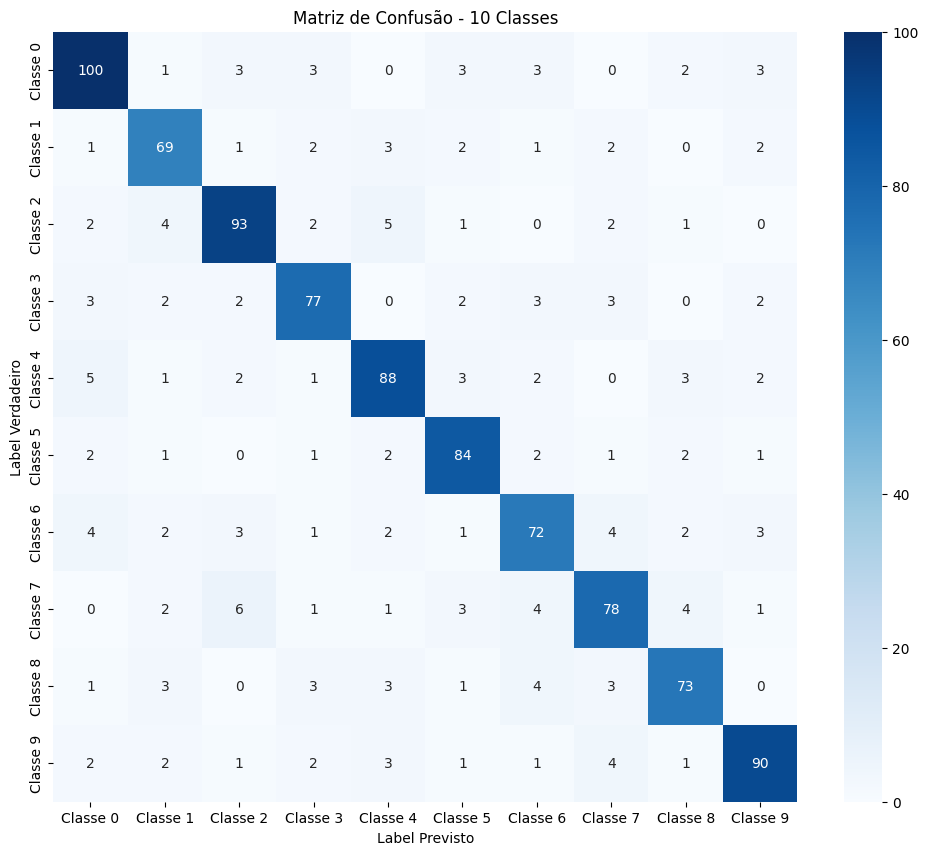


Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.83      0.85      0.84       118
    Classe 1       0.79      0.83      0.81        83
    Classe 2       0.84      0.85      0.84       110
    Classe 3       0.83      0.82      0.82        94
    Classe 4       0.82      0.82      0.82       107
    Classe 5       0.83      0.88      0.85        96
    Classe 6       0.78      0.77      0.77        94
    Classe 7       0.80      0.78      0.79       100
    Classe 8       0.83      0.80      0.82        91
    Classe 9       0.87      0.84      0.85       107

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



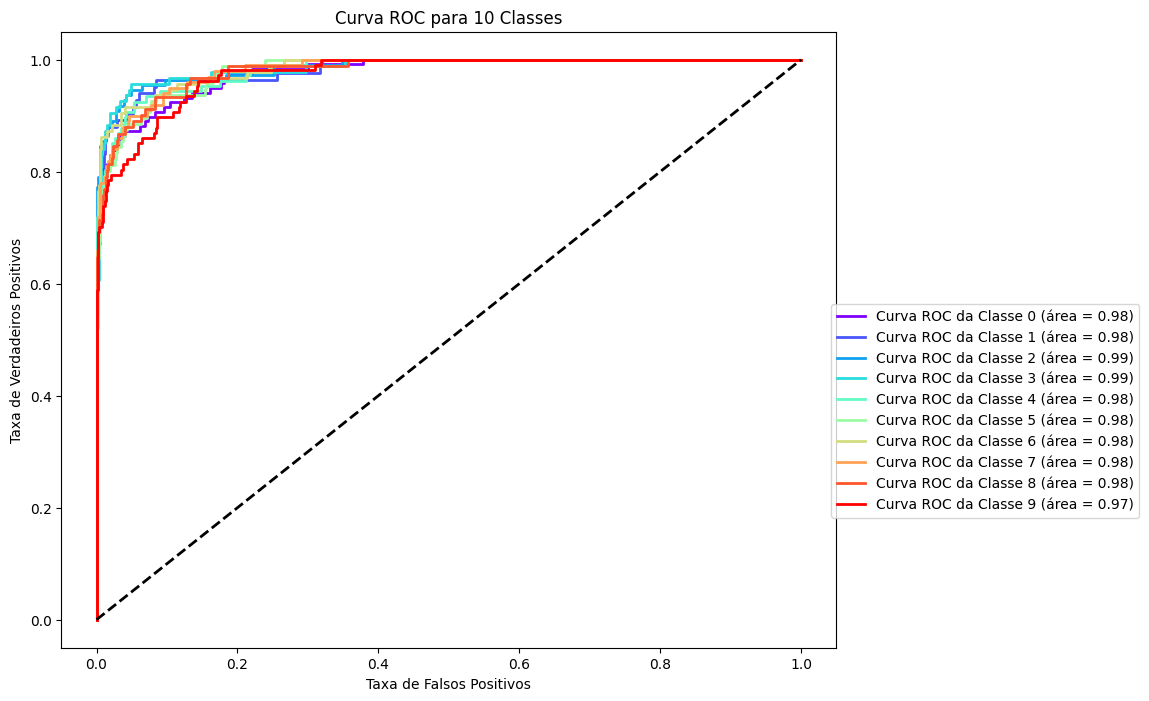

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize

np.random.seed(42)
n_samples = 1000
n_classes = 10

labels = np.random.randint(0, n_classes, n_samples)

predictions = labels.copy()
for i in range(int(n_samples * 0.2)):
    predictions[i] = np.random.randint(0, n_classes)

predicted_probs = np.random.rand(n_samples, n_classes)
predicted_probs = predicted_probs / predicted_probs.sum(axis=1, keepdims=True)
for i in range(n_samples):
    predicted_probs[i, labels[i]] += np.random.uniform(0.1, 0.3)
predicted_probs = predicted_probs / predicted_probs.sum(axis=1, keepdims=True)

accuracy = accuracy_score(labels, predictions)
print(f"Acurácia: {accuracy * 100:.2f}%")

recall = recall_score(labels, predictions, average='weighted')
print(f"Sensibilidade (Recall) Média: {recall * 100:.2f}%")

f1 = f1_score(labels, predictions, average='weighted')
print(f"F1-Score Médio: {f1 * 100:.2f}%")

conf_matrix = confusion_matrix(labels, predictions)
class_names = [f'Classe {i}' for i in range(n_classes)]

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão - 10 Classes')
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(labels, predictions, target_names=class_names))

labels_bin = label_binarize(labels, classes=list(range(n_classes)))
n_classes = labels_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_bin[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC da {class_names[i]} (área = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para 10 Classes')
plt.legend(loc="lower right", bbox_to_anchor=(1.4, 0.2))
plt.show()